In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [4]:
ca_df = pd.read_csv(r"C:\Users\aykut\OneDrive\Belgeler\GitHub\IH_RH_DA_FT_AUG_2022\Class_Materials\Case_Studies\Customer_Analysis_Case_Study\Data\Data_Marketing_Customer_Analysis_Round3.csv")

In [5]:
ca_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [6]:
numerical = ca_df.select_dtypes(include=np.number)

In [7]:
categorical =ca_df.select_dtypes(include=np.object)

C:\Users\aykut\AppData\Local\Temp\ipykernel_24984\2534234582.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical =ca_df.select_dtypes(include=np.object)


In [8]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [9]:
customer_lifetime_value = ca_df['customer_lifetime_value']

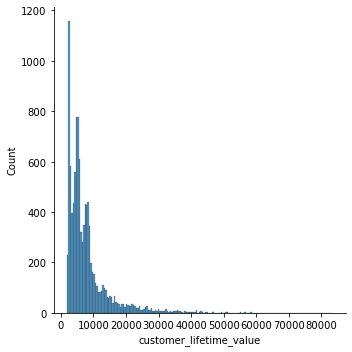

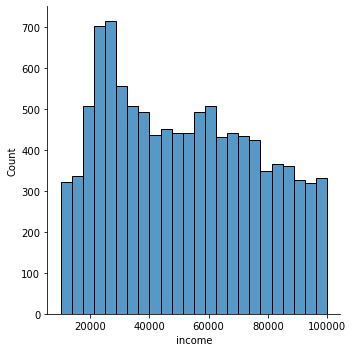

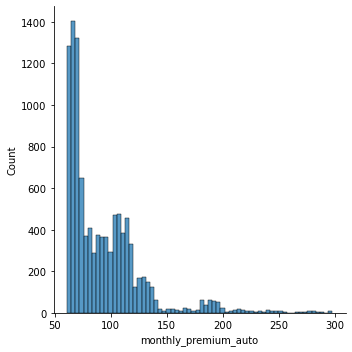

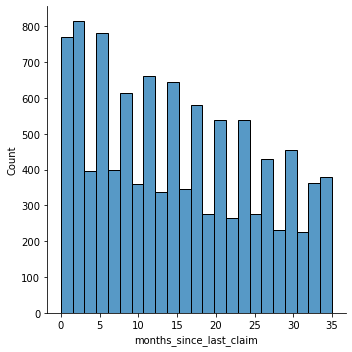

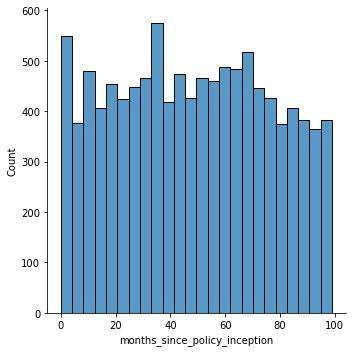

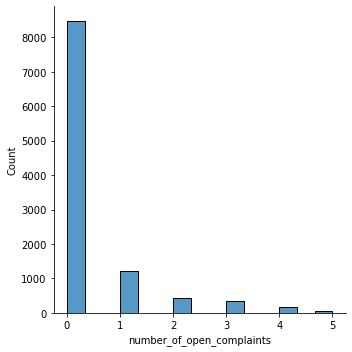

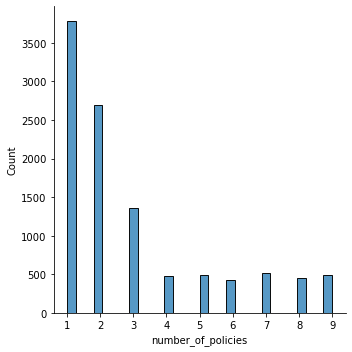

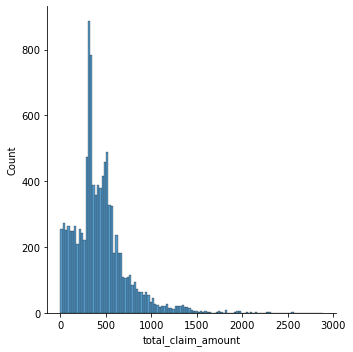

In [10]:
Plots = {}

for i in numerical.columns:
    Plots[i] = sns.displot(numerical[i])

In [11]:
histograms = plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

(array([1.493e+03, 1.396e+03, 3.205e+03, 2.318e+03, 9.720e+02, 5.340e+02,
        3.180e+02, 1.430e+02, 1.120e+02, 1.020e+02, 2.800e+01, 1.400e+01,
        1.800e+01, 1.400e+01, 1.000e+01, 5.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00]),
 array([   0.  ,  144.65,  289.3 ,  433.95,  578.6 ,  723.25,  867.9 ,
        1012.55, 1157.2 , 1301.85, 1446.5 , 1591.15, 1735.8 , 1880.45,
        2025.1 , 2169.75, 2314.4 , 2459.05, 2603.7 , 2748.35, 2893.  ]),
 <BarContainer object of 20 artists>)

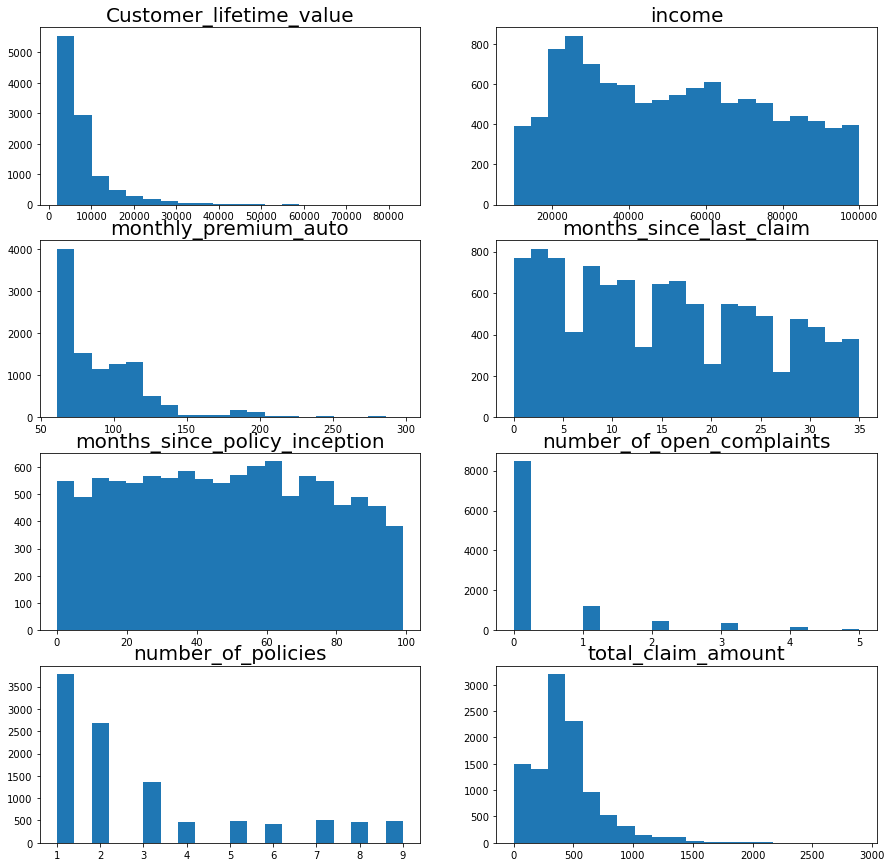

In [12]:
fig, ax = plt.subplots(4,2,figsize = (15, 15))

ax[0,0].set_title('Customer_lifetime_value',fontsize = 20)

ax[0,1].set_title('income',fontsize = 20)

ax[1,0].set_title('monthly_premium_auto',fontsize = 20)
    
ax[1,1].set_title('months_since_last_claim',fontsize = 20)

ax[2,0].set_title('months_since_policy_inception',fontsize = 20)

ax[2,1].set_title('number_of_open_complaints',fontsize = 20)

ax[3,0].set_title('number_of_policies',fontsize = 20)

ax[3,1].set_title('total_claim_amount',fontsize = 20)

ax[0,0].hist(ca_df['customer_lifetime_value'], bins = 20)

ax[0,1].hist(ca_df['income'], bins = 20)

ax[1,0].hist(ca_df['monthly_premium_auto'], bins =20)

ax[1,1].hist(ca_df['months_since_last_claim'], bins=20)

ax[2,0].hist(ca_df['months_since_policy_inception'], bins=20)

ax[2,1].hist(ca_df['number_of_open_complaints'],bins=20)

ax[3,0].hist(ca_df['number_of_policies'], bins=20)

ax[3,1].hist(ca_df['total_claim_amount'], bins=20)




    
    

**Column income has a normal distribution**

In [13]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [14]:
corr = numerical.corr()

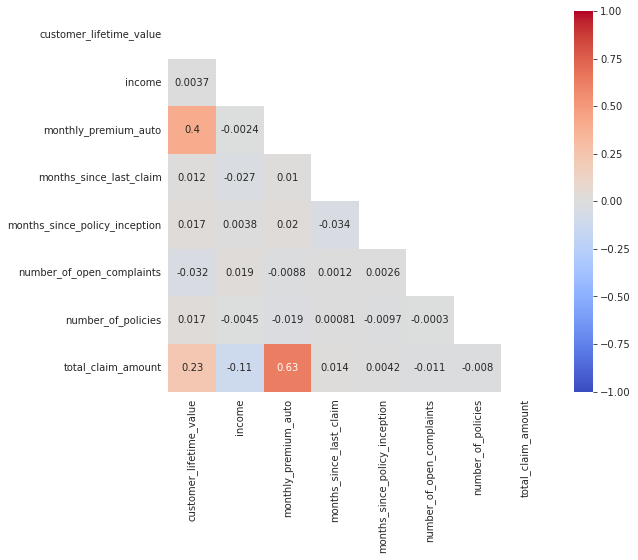

In [15]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

**We observe a positive correlation between total_claim_amount and montly_premium_auto**

In [16]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


Text(0.5, 1.0, 'Total Number of Responses')

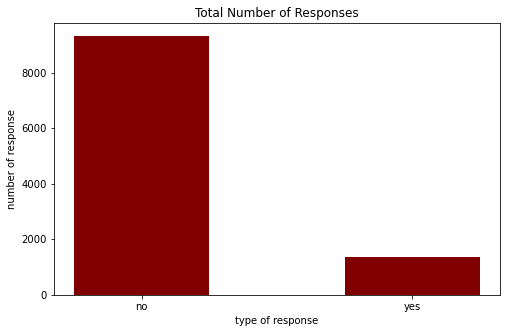

In [17]:
response=categorical['response'].value_counts()

response

typeofresponse = response.index

values = response.values

fig2 = plt.figure(figsize=(8,5))

plt.bar(typeofresponse, values, color ='maroon', width = 0.5)

plt.xlabel('type of response')

plt.ylabel('number of response')

plt.title('Total Number of Responses')





In [18]:
categorical['response'].values

categorical['sales_channel'].values

array(['agent', 'call center', 'call center', ..., 'web', 'branch', 'web'],
      dtype=object)

- Show a plot of the response by the sales channel.

- Show a plot of the response by the total claim amount.

- Show a plot of the response by income. 
- (Optional) Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

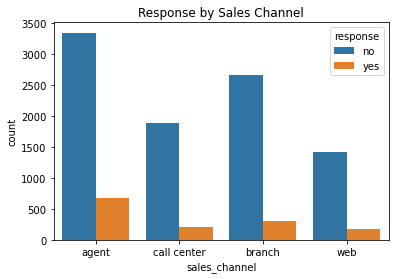

In [19]:



fig3, ax3 = plt.subplots()

ax3.set_title("Response by Sales Channel")

ax3 = sns.countplot(x=categorical['sales_channel'], hue=categorical['response'])

,index,response,total_claim_amount,income
0,0,no,292,48029
1,1,no,744,92260
2,2,no,480,22139
3,3,yes,484,49078
4,4,no,707,23675
...,...,...,...,...
10684,10684,no,1214,61541
10685,10685,no,273,61146
10686,10686,no,381,39837
10687,10687,no,618,64195


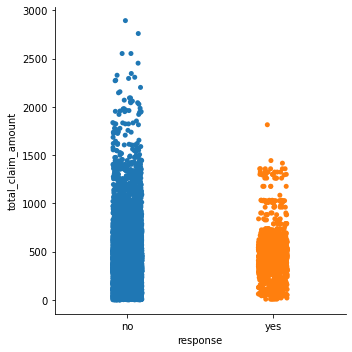

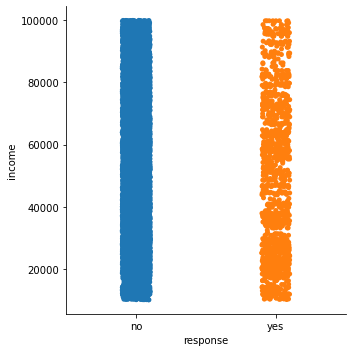

In [20]:
responsevstotal_claim = ca_df[['response','total_claim_amount','income']].reset_index()

responsevstotal_claim




sns.catplot(x='response', y='total_claim_amount',data=responsevstotal_claim) 

sns.catplot(x='response', y='income', data=responsevstotal_claim)
        
        
responsevstotal_claim




In [21]:
corr_matrix=ca_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]

- There is no higly (>80) correlated features 

# Modeling


In [22]:
categorical['number_of_open_complaints'] = ca_df['number_of_open_complaints'] #adding number of complaints in categorical table

In [23]:
categorical = categorical.sort_index(axis=1) #sorting indexes of columns

In [24]:
education_level = {'high school or below':1,  #converting education column to ordinal values
                  'bachelor':2,
                   'college':3,
                  'bachelor':4,
                   'master':5,
                   'doctor':6}
education = []
for x in categorical['education']:
    if x in education_level:
        education.append(education_level[x])

In [25]:
categorical['education'] = education

In [26]:


categorical['coverage'] = [1 if x == 'basic' else               #conversion of coverage column to ordinal values
                           2 if  x =='extended' else 
                           3 
                           for x in categorical['coverage']]



In [27]:
categorical.drop('effective_to_date', axis=1, inplace=True) #dropping effective_to_date

In [28]:
categorical['policy'].value_counts()

#grouping policy types as personal, corporate and special                       

categorical['policy'] = ['personal' if x in ('personal l1','personal l2','personal l3') else 
                         'corporate' if x in ('corporate l3','corporate l2', 'corporate l1') else 
                         'special'  for x in categorical['policy']]

In [29]:
categorical_features=pd.get_dummies(categorical, drop_first=True) # One_Hot Encoding

In [30]:
categorical_features

,coverage,education,number_of_open_complaints,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,1,3,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,3,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,4,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,2,3,0,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4,3,4,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,3,4,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
10685,1,3,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,2,4,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,3,3,4,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0


## Predictive Modeling

- X - Y Splitting


In [31]:
X=ca_df.drop(['total_claim_amount','number_of_open_complaints'], axis=1) #dropping no of open complaints and target variable and getting numeric data
X=X._get_numeric_data()

In [32]:
y=ca_df.total_claim_amount #creating target variable

## Data Splitting

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [34]:
std_scaler=StandardScaler().fit(X_train)       # Scaling data
X_train_scaled=std_scaler.transform(X_train)

In [35]:
X_train_scaled.shape

(7482, 6)

In [36]:
X_train.shape

(7482, 6)

In [37]:
X_test_scaled=std_scaler.transform(X_test)

In [38]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823  0.77999322  1.36516733 -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 -0.90288055  1.68786198  0.84759702]
 [-0.5223013   0.26592193  0.48489091 -0.90288055  0.50464827 -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 -1.00187313 -1.39566466 -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115  0.97797837 -1.61079442 -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532  0.87898579  0.21780858 -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178  0.28503034  1.54444214  2.51614162]
 [-0.7597249  -0.93947257 -0.64253     1.47294124  0.755633   -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 -1.496836    0.39708339 -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355  0.87898579 -1.18053489 -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938  0.58200807 -1.61079442  0.43046087]
 [-0.49881985 -0.95695203  0.71615674  1.76991896 -1.00126009 -0.82094758]]


In [39]:
model = LinearRegression()
model.fit(X_train_scaled, y_train) # model train

LinearRegression()

In [40]:
model.coef_

array([ -6.66315266, -33.13187424, 187.82156671,   1.91008198,
        -0.91279703,  -2.31317812])

In [41]:
model.intercept_

433.0597433841219

In [42]:
# y=
#   customer_lifetime_value*-6.54371951 + income*-34.11517447+monthly_premium_auto*187.95122895+
# months_since_last_claim*0.85408321+months_since_policy_inception*-1.32884425+number_of_policies*-0.24353298

In [43]:
y_pred_test=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [44]:
y_pred_test

array([261.36211959, 352.59009828, 298.28557351, ..., 368.29026143,
       316.48312353, 608.79238606])

In [45]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [46]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test})

In [47]:
result

,y_test,y_pred
4665,345,261.362120
4072,345,352.590098
4549,257,298.285574
4211,445,290.821585
3081,523,553.657189
...,...,...
3488,404,316.125189
1667,554,424.659496
1516,350,368.290261
10215,27,316.483124


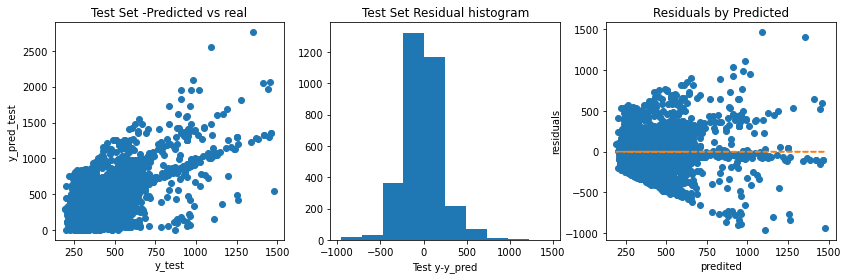

In [48]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred_test")
ax[0].set_title("Test Set -Predicted vs real")

ax[1].hist(y_test - y_pred_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test,y_test - y_pred_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test,np.zeros(len(y_pred_test)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

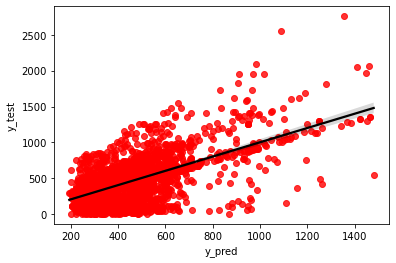

In [49]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [50]:
print(mse(y_test,y_pred_test)) #mse and mae for test data set
print(mae(y_test,y_pred_test))

rmse=mse(y_test,y_pred_test)**0.5
print(rmse) # rmse for test data 

49403.17881141506
151.97245752690142
222.26825866824768


In [51]:
print(mse(y_train,y_pred_train)) # calculation of mse for train data set

rmse_train=mse(y_train,y_pred_train)**0.5
print(rmse_train)

51010.87789203499
225.85587858640073


In [52]:
R2=r2_score(y_test,y_pred_test) # calculation of R2
R2

0.40774244022467265

In [53]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # calculation of adjusted R2

In [54]:
Adj_R2

0.40663195730009394

In [55]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [56]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.821567
1,income,33.131874
0,customer_lifetime_value,6.663153
5,number_of_policies,2.313178
3,months_since_last_claim,1.910082
4,months_since_policy_inception,0.912797


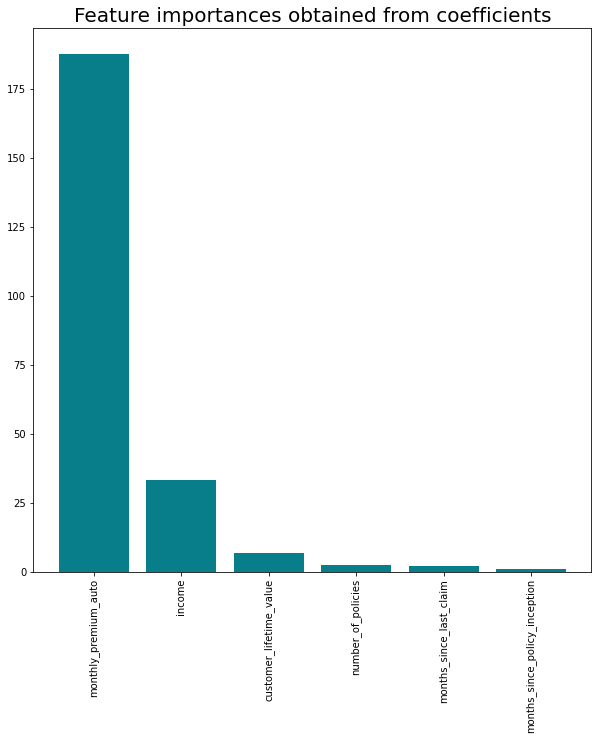

In [57]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Rerunning the model after adding hot encoded categorical variables 

In [58]:
all_data = pd.concat([X, categorical_features], axis = 1)

In [59]:
all_data.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_policies', 'coverage', 'education',
       'number_of_open_complaints', 'employment_status_employed',
       'employment_status_medical leave', 'employment_status_retired',
       'employment_status_unemployed', 'gender_m', 'location_code_suburban',
       'location_code_urban', 'marital_status_married',
       'marital_status_single', 'month_jan', 'policy_personal',
       'policy_special', 'policy_type_personal auto',
       'policy_type_special auto', 'region_east', 'region_north west',
       'region_west region', 'renew_offer_type_offer2',
       'renew_offer_type_offer3', 'renew_offer_type_offer4', 'response_yes',
       'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'vehicle_class_luxury car',
       'vehicle_class_luxury suv', 'vehicle_class_sports car',
       'vehicle_class_suv', 'vehicle_cla

- X Y Split

In [60]:
X= all_data

In [61]:
y= y=ca_df.total_claim_amount 

- Data Splitting

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=130)

In [63]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [64]:
X_test_scaled=std_scaler.transform(X_test)

In [65]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.53430533 -0.86466496  0.60024356 ... -0.50346429  0.64682967
  -0.48525144]
 [ 1.58685262 -0.37410562 -0.81947151 ...  1.98623818  0.64682967
  -0.48525144]
 [-0.06069898  1.64975371 -0.87741906 ... -0.50346429  0.64682967
  -0.48525144]
 ...
 [-0.57746508  1.28642565  0.54229601 ... -0.50346429  0.64682967
  -0.48525144]
 [-0.78117911 -1.46827849 -0.64562884 ... -0.50346429  0.64682967
  -0.48525144]
 [-0.19780313 -0.85769725  2.77327683 ... -0.50346429  0.64682967
  -0.48525144]]
--------
[[-0.39979077  1.05008721 -0.81947151 ... -0.50346429 -1.54600205
   2.06078731]
 [-0.76923825 -1.19327527 -0.7035764  ... -0.50346429 -1.54600205
  -0.48525144]
 [-0.6085401   1.9088077   0.51332223 ...  1.98623818 -1.54600205
   2.06078731]
 ...
 [-0.47402554 -0.09451097  1.23766666 ... -0.50346429  0.64682967
  -0.48525144]
 [-0.1221297  -1.56510153 -0.79049773 ... -0.50346429  0.64682967
  -0.48525144]
 [ 0.71617656  0.98326965 -0.29794352 ... -0.50346429  0.64682967
  -0.48525144]]


In [66]:
X_train.shape

(7482, 40)

In [67]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [68]:
model.coef_

array([-4.34220018e-01, -2.97887601e+00,  1.80636917e+02,  4.80312090e+00,
        1.30766457e-01,  7.17780970e-01, -6.34614283e+00, -6.48062669e+00,
       -2.48773598e+00, -5.46307246e+00,  2.74724430e+00, -1.12902080e+00,
        3.44412624e+01,  7.98881093e+00,  1.84316396e+02,  8.51302908e+01,
       -9.49605784e-01,  3.38533235e+01,  9.02221819e-01, -4.66753766e+13,
        3.31596044e+13,  4.66753766e+13, -3.31596044e+13,  1.71792561e+00,
       -1.12135550e+00,  7.83230363e-01,  5.54098240e+00,  2.28882377e+00,
        2.53497999e+00, -8.36492387e+00, -9.76566050e-01, -3.85015649e-01,
       -6.77463015e-01,  2.64708099e+00, -4.06594452e+00, -5.01530189e+00,
       -7.69087423e+00, -5.90610110e-01, -3.91784697e+00, -8.45906840e-01])

In [69]:
model.intercept_

434.14822240042776

In [70]:
y_pred_test=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [71]:
y_pred_test

array([199.01529428, 399.73169408, 756.30094559, ..., 862.82852661,
       430.68393902, 123.11031851])

In [72]:
y_test

10363    255
6364     352
5796     799
8931     556
9775     702
        ... 
7190     151
8712     712
7514     652
8797     316
9893      42
Name: total_claim_amount, Length: 3207, dtype: int64

In [73]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test})

In [74]:
result

,y_test,y_pred
10363,255,199.015294
6364,352,399.731694
5796,799,756.300946
8931,556,652.750314
9775,702,675.964904
...,...,...
7190,151,-5.498870
8712,712,657.771362
7514,652,862.828527
8797,316,430.683939


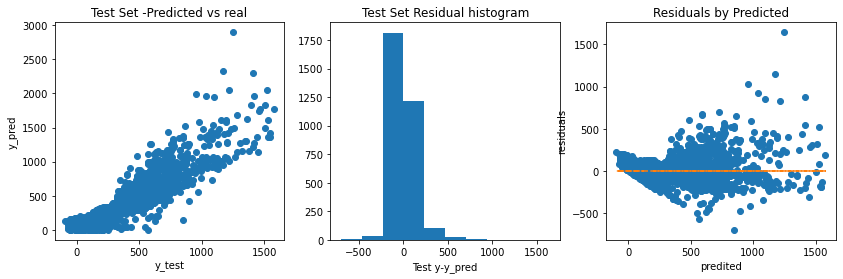

In [75]:

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test,y_test - y_pred_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test,np.zeros(len(y_pred_test)),linestyle='dashed')

In [76]:
print(mse(y_test,y_pred_test))
print(mae(y_test,y_pred_test))

18746.435402305062
94.81777221636716


In [77]:
mse(y_train,y_pred_train)

20059.905035250893

In [78]:
R2=r2_score(y_test,y_pred_test)
R2

0.7762159617897858

In [79]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [80]:
Adj_R2

0.7733886208142935

In [81]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [82]:
features_importances

,Attribute,Importance
19,policy_personal,4.667538e+13
21,policy_type_personal auto,4.667538e+13
20,policy_special,3.315960e+13
22,policy_type_special auto,3.315960e+13
14,location_code_suburban,1.843164e+02
2,monthly_premium_auto,1.806369e+02
15,location_code_urban,8.513029e+01
12,employment_status_unemployed,3.444126e+01
17,marital_status_single,3.385332e+01
29,response_yes,8.364924e+00


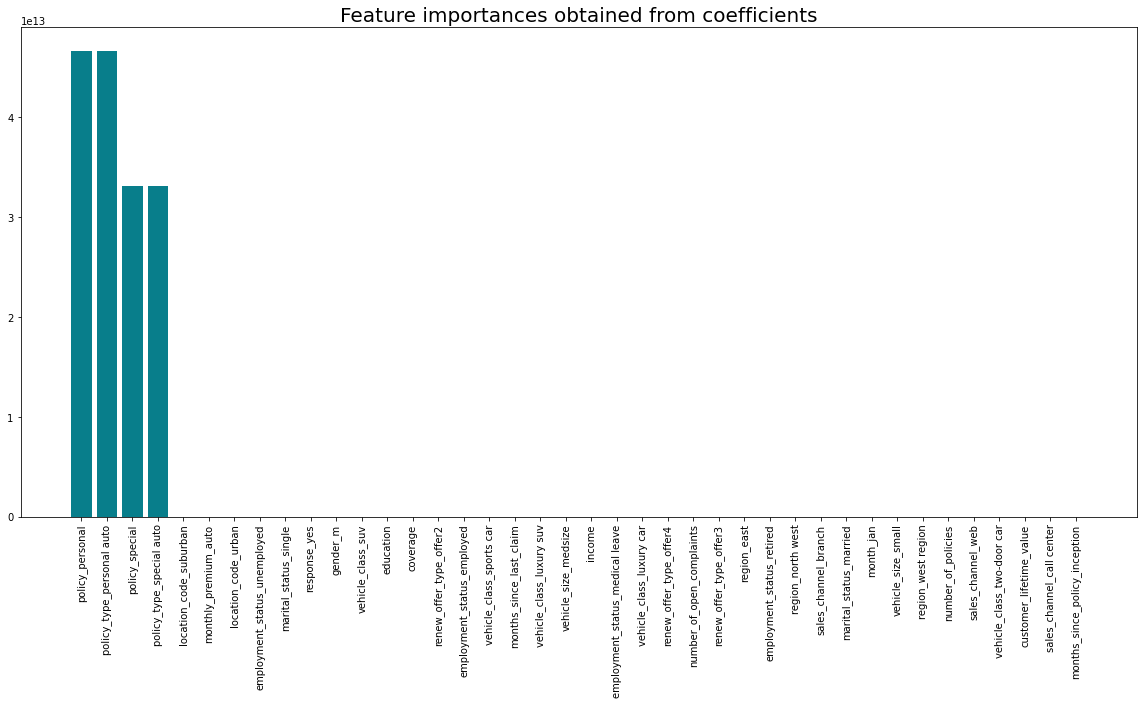

In [96]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)

plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
all_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,coverage,education,number_of_open_complaints,employment_status_employed,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,9,1,3,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,1,1,3,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,2,1,4,0,1,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,2,2,3,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,7,3,4,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,3,4,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,6,1,3,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,2,2,4,0,1,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,6,3,3,4,1,...,1,0,0,0,0,0,1,0,1,0
